In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

2.6.0


In [4]:
base_dir='./data/'
train_path=os.path.join(base_dir,'train')
val_path=os.path.join(base_dir,'validation')
test_path=os.path.join(base_dir,'test')

train_cats=os.path.join(train_path,'cats')
train_dogs=os.path.join(train_path,'dogs')

validation_cats=os.path.join(val_path,'cats')
validation_dogs=os.path.join(val_path,'dogs')

test_cats=os.path.join(test_path,'cats')
test_dogs=os.path.join(test_path,'dogs')

In [5]:
def check(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [92]:

model=tf.keras.Sequential()

##layer 1
# model.add(tf.keras.layers.Input())
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(64,64,3)))
# model.add(tf.keras.layers.BatchNormalization())#
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(2,2,padding='SAME'))


##layer2
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2,padding='SAME'))


model.add(tf.keras.layers.Flatten())


model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2,activation='softmax'))


model.compile(optimizer='adam',metrics=['acc'],loss=['categorical_crossentropy'])

print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)              

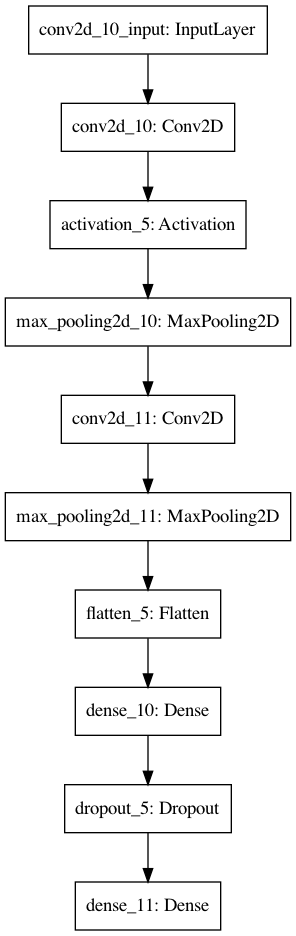

In [93]:
utils.plot_model(model)##

In [94]:

train_dataGen=ImageDataGenerator(rescale=1./255)
val_dataGen=ImageDataGenerator(rescale=1./255)
test_dataGen=ImageDataGenerator(rescale=1./255)

In [95]:

batch_size=32
train_generator=train_dataGen.flow_from_directory(train_path,
                                                  target_size=(64,64),#
                                                  batch_size=batch_size,
                                                  class_mode='categorical')
val_generator=val_dataGen.flow_from_directory(val_path,
                                                  target_size=(64,64),
                                                  batch_size=batch_size,
                                                  class_mode='categorical'
                                                  )
test_generator=val_dataGen.flow_from_directory(test_path,
                                                  target_size=(64,64),#
                                                  batch_size=batch_size,
                                                  class_mode='categorical'
                                                  )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [177]:
num_train=0
for file in os.listdir(train_path):
    num_train+=len(os.listdir(os.path.join(train_path,file)))
num_val=0
for file in os.listdir(val_path):
    num_val+=len(os.listdir(os.path.join(val_path,file)))
num_train,num_val

In [97]:

check("./logs")


early_stop=EarlyStopping(monitor="val_loss",patience=10,verbose=1)
reduce_lr=ReduceLROnPlateau(monitor="val_loss",patience=5,verbose=1)
save_model=ModelCheckpoint("./logs/without_data_enhance.h5",monitor='val_loss',save_best_only=True,save_weights_only=True)

history=model.fit_generator(train_generator,
                            steps_per_epoch=num_train//batch_size,
                            epochs=120,#
                            validation_data=val_generator,
                            verbose=1,
                            validation_steps=num_val//batch_size,
                            callbacks=[early_stop,reduce_lr,save_model]
                            )

Epoch 1/120
62/62 [==============================] - 11s 175ms/step - loss: 0.7271 - acc: 0.5518 - val_loss: 0.6849 - val_acc: 0.5625
Epoch 2/120
62/62 [==============================] - 10s 158ms/step - loss: 0.6391 - acc: 0.6311 - val_loss: 0.6488 - val_acc: 0.6583
Epoch 3/120
62/62 [==============================] - 11s 170ms/step - loss: 0.6061 - acc: 0.6839 - val_loss: 0.6221 - val_acc: 0.6542
Epoch 4/120
62/62 [==============================] - 11s 173ms/step - loss: 0.5549 - acc: 0.7282 - val_loss: 0.6112 - val_acc: 0.6562
Epoch 5/120
62/62 [==============================] - 10s 166ms/step - loss: 0.4817 - acc: 0.7774 - val_loss: 0.6848 - val_acc: 0.6442
Epoch 6/120
62/62 [==============================] - 9s 148ms/step - loss: 0.4107 - acc: 0.8155 - val_loss: 0.6907 - val_acc: 0.6613
Epoch 7/120
62/62 [==============================] - 10s 154ms/step - loss: 0.3783 - acc: 0.8343 - val_loss: 0.6682 - val_acc: 0.6774
Epoch 8/120
62/62 [==============================] - 10s 165ms/

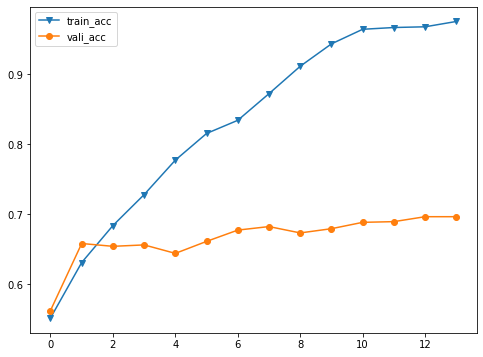

In [98]:
#
train_acc=history.history['acc']
vali_acc=history.history['val_acc']

train_loss=history.history['loss']
vali_loss=history.history['val_loss']

plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)),train_acc,marker='v',label='train_acc')
plt.plot(range(len(train_acc)),vali_acc,marker='o',label='vali_acc')
plt.legend()
plt.show()

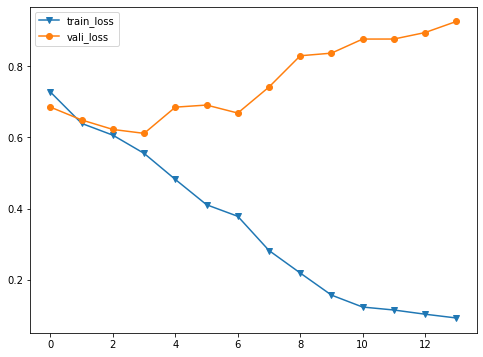

In [99]:

plt.figure(figsize=(8,6))
plt.plot(range(len(train_loss)),train_loss,marker='v',label='train_loss')
plt.plot(range(len(train_loss)),vali_loss,marker='o',label='vali_loss')
plt.legend()
plt.show()

In [100]:

model.evaluate(test_generator)

32/32 [==============================] - 4s 110ms/step - loss: 0.9501 - acc: 0.7060


[0.9500734806060791, 0.7059999704360962]

In [158]:
from PIL import Image
import keras.backend as K
import glob
import shutil
import random

In [159]:

def plot_pic(path,title):
    all_length=len(glob.glob(path))
    for j in range(all_length):
        pic_lst=glob.glob(glob.glob(path)[j]+'/*')
        length=len(pic_lst)
        fig=plt.figure(figsize=(12,8),dpi=100)
        for i in range(length):
            img=Image.open(pic_lst[i])
            sub=fig.add_subplot(1,length,i+1)
            sub.imshow(img)
            plt.axis('off')
            plt.title(title)

In [161]:
in_path='./data_enhance/'
in_path_dog=in_path+'dog'
in_path_cat=in_path+'cat'
check(in_path)
check(in_path_cat)
check(in_path_dog)
if os.path.exists(in_path_dog):
    for img in os.listdir(in_path_dog):
        os.remove(os.path.join(in_path_dog,img))
        
if os.path.exists(in_path_cat):
    for img in os.listdir(in_path_cat):
        os.remove(os.path.join(in_path_cat,img))
        
check(in_path)

for dog in random.sample(os.listdir(train_dogs),3):
    shutil.copy(os.path.join(train_dogs,dog),os.path.join(os.path.join(in_path,'dog'),dog))
for cat in random.sample(os.listdir(train_cats),2):
    shutil.copy(os.path.join(train_cats,cat),os.path.join(os.path.join(in_path,'cat'),cat))

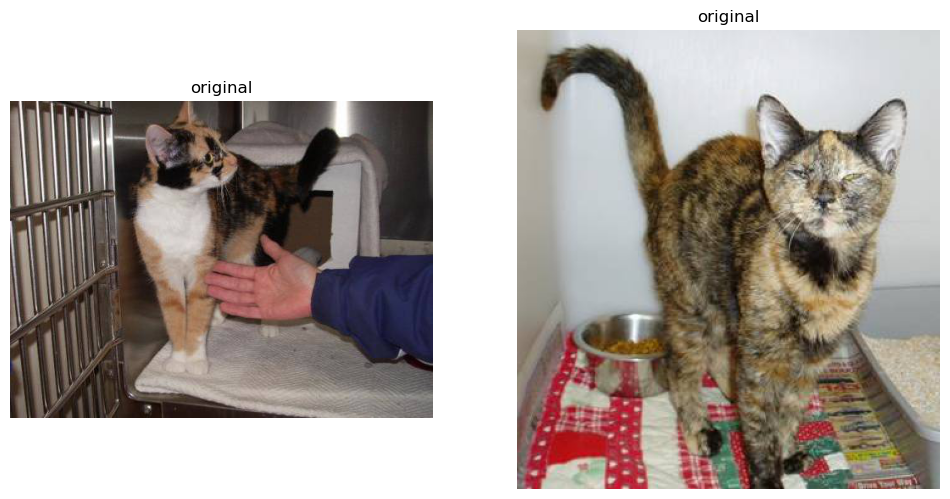

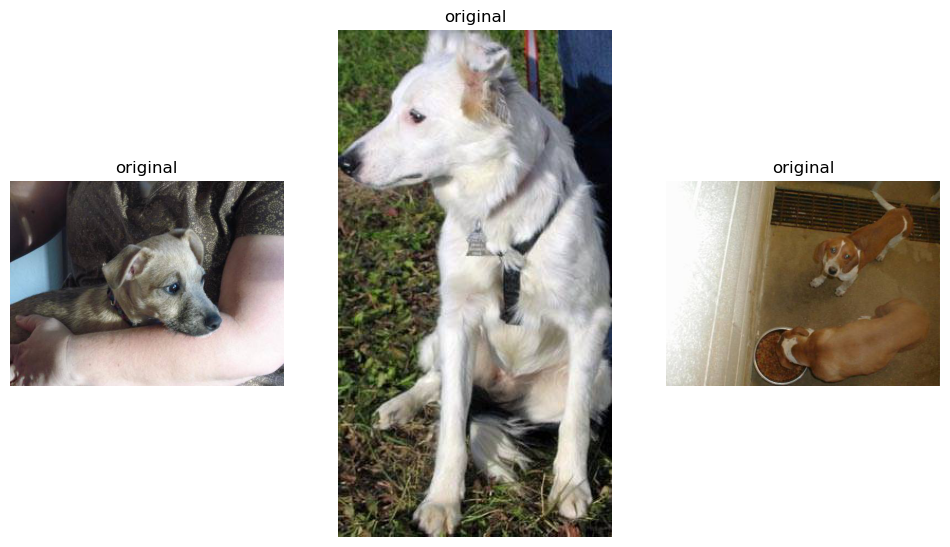

In [162]:
plot_pic(in_path+'*','original')

In [163]:
def clearn_path(path):
    if os.path.exists(path):
        for img in os.listdir(path):
            os.remove(os.path.join(path,img))

In [164]:
from_path='./data_enhance/'
check(from_path)
check('./data_out/')
to_path='./data_out/resize'
check(to_path)
clearn_path(to_path)
try:os.mkdir(to_path)
except:pass

In [165]:
gen=ImageDataGenerator()
gen_data=gen.flow_from_directory(from_path,batch_size=1,shuffle=False,save_to_dir=to_path,target_size=(64,64),
                       save_prefix='resize')

Found 5 images belonging to 2 classes.


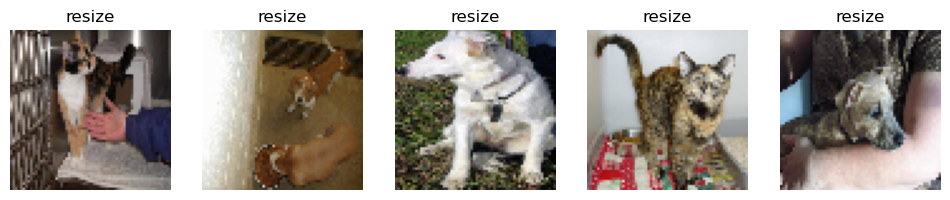

In [166]:
for i in range(len(gen_data)):
    gen_data.next()
plot_pic(to_path,'resize')

In [167]:
rotation_path='./data_out/rotation'
try:os.mkdir(rotation_path)
except:pass
clearn_path(rotation_path)
# gen_model=ImageDataGenerator()
fit_model=ImageDataGenerator(rotation_range=60)
gen_data=fit_model.flow_from_directory(from_path,batch_size=1,shuffle=False,save_to_dir=rotation_path,target_size=(64,64),
                       save_prefix='rotation')
for i in range(len(gen_data)):
    gen_data.next()

Found 5 images belonging to 2 classes.


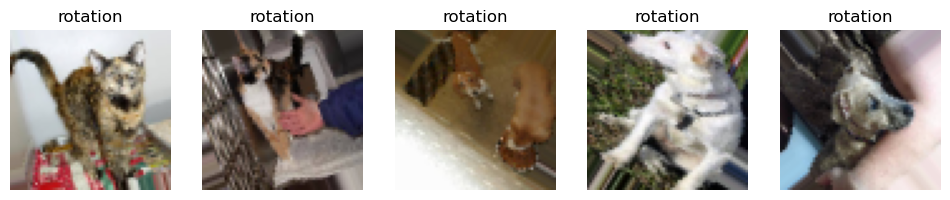

In [168]:
plot_pic(rotation_path,'rotation')

In [169]:
inverse_path='./data_out/inverse'
try:os.mkdir(inverse_path)
except:pass

clearn_path(inverse_path)
fit_model=ImageDataGenerator(width_shift_range=0.3,height_shift_range=0.3)##
gen_data=fit_model.flow_from_directory(from_path,batch_size=1,shuffle=False,save_to_dir=inverse_path,target_size=(64,64),
                       save_prefix='inverse')
for i in range(len(gen_data)):
    gen_data.next()

Found 5 images belonging to 2 classes.


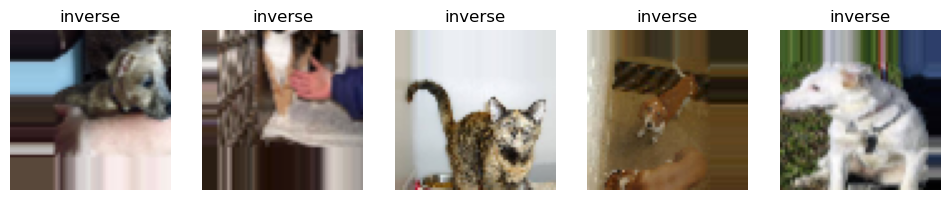

In [170]:
plot_pic(inverse_path,'inverse')

In [171]:
zoom_path='./data_out/zoom'
try:os.mkdir(zoom_path)
except:pass

clearn_path(zoom_path)

fit_model=ImageDataGenerator(zoom_range=0.3)#
gen_data=fit_model.flow_from_directory(from_path,batch_size=1,shuffle=False,save_to_dir=zoom_path,target_size=(64,64),
                       save_prefix='zoom')
for i in range(len(gen_data)):
    gen_data.next()

Found 5 images belonging to 2 classes.


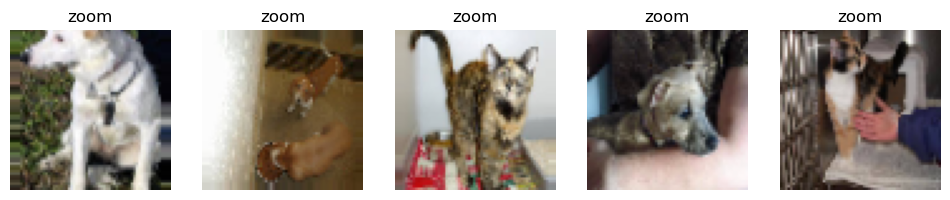

In [172]:
plot_pic(zoom_path,'zoom')

In [173]:
channel_path='./data_out/channel'
try:os.mkdir(channel_path)
except:pass
# gen_model=ImageDataGenerator()

clearn_path(channel_path)


fit_model=ImageDataGenerator(channel_shift_range=15)#
gen_data=fit_model.flow_from_directory(from_path,batch_size=1,shuffle=False,save_to_dir=channel_path,target_size=(64,64),
                       save_prefix='channel')
for i in range(len(gen_data)):
    gen_data.next()

Found 5 images belonging to 2 classes.


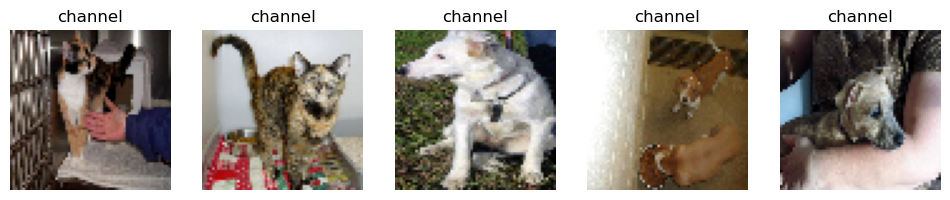

In [174]:
plot_pic(channel_path,'channel')

In [175]:
horizontal_path='./data_out/horizontal'
try:os.mkdir(horizontal_path)
except:pass
# gen_model=ImageDataGenerator()

clearn_path(horizontal_path)


fit_model=ImageDataGenerator(horizontal_flip=True)
gen_data=fit_model.flow_from_directory(from_path,batch_size=1,shuffle=False,save_to_dir=horizontal_path,target_size=(64,64),
                       save_prefix='horizontal')
for i in range(len(gen_data)):
    gen_data.next()

Found 5 images belonging to 2 classes.


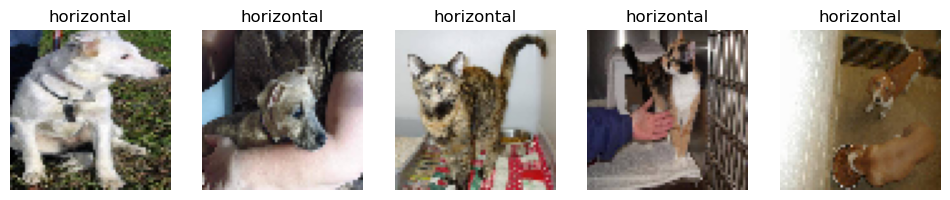

In [176]:
plot_pic(horizontal_path,'horizontal')

In [34]:

train_dataGen=ImageDataGenerator(rescale=1./255,rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_dataGen=ImageDataGenerator(rescale=1./255)

forest_dataGen=ImageDataGenerator(rescale=1./255)

In [35]:
train_after_generator=train_dataGen.flow_from_directory(train_path,
                                                       target_size=(64,64),
                                                       class_mode='categorical',
                                                       batch_size=20)

Found 2000 images belonging to 2 classes.


In [36]:
vali_data=test_dataGen.flow_from_directory(val_path,
                                          target_size=(64,64),
                                          class_mode='categorical',
                                          batch_size=20)

Found 1000 images belonging to 2 classes.


In [103]:

model=tf.keras.Sequential()

##layer 1
# model.add(tf.keras.layers.Input())
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(64,64,3)))
# model.add(tf.keras.layers.BatchNormalization()
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(2,2,padding='SAME'))


##layer2
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2,padding='SAME'))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2,activation='softmax'))


model.compile(optimizer='adam',metrics=['acc'],loss=['categorical_crossentropy'])

print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)              

In [75]:
check("./after_enhance_data_logs")


early_stop=EarlyStopping(monitor="val_loss",patience=10,verbose=1)
reduce_lr=ReduceLROnPlateau(monitor="val_loss",patience=5,verbose=1)
save_model=ModelCheckpoint("./after_enhance_data_logs/data_enhance.h5",monitor='val_loss',save_best_only=True,save_weights_only=True)

after_enhance_data_history=model.fit_generator(train_after_generator,
                            steps_per_epoch=num_train//batch_size,
                            epochs=120,
                            validation_data=val_generator,
                            verbose=1,
                            validation_steps=num_val//batch_size,
                            callbacks=[early_stop,reduce_lr,save_model]
                            )

Epoch 1/120
62/62 [==============================] - 11s 172ms/step - loss: 0.6996 - acc: 0.5048 - val_loss: 0.6922 - val_acc: 0.5081
Epoch 2/120
62/62 [==============================] - 9s 146ms/step - loss: 0.6928 - acc: 0.5274 - val_loss: 0.6881 - val_acc: 0.5232
Epoch 3/120
62/62 [==============================] - 9s 148ms/step - loss: 0.6929 - acc: 0.5177 - val_loss: 0.6887 - val_acc: 0.5252
Epoch 4/120
62/62 [==============================] - 9s 150ms/step - loss: 0.6906 - acc: 0.5363 - val_loss: 0.6821 - val_acc: 0.5091
Epoch 5/120
62/62 [==============================] - 9s 141ms/step - loss: 0.6897 - acc: 0.5702 - val_loss: 0.6540 - val_acc: 0.5998
Epoch 6/120
62/62 [==============================] - 9s 141ms/step - loss: 0.6705 - acc: 0.5976 - val_loss: 0.6600 - val_acc: 0.6079
Epoch 7/120
62/62 [==============================] - 10s 156ms/step - loss: 0.6781 - acc: 0.5565 - val_loss: 0.6634 - val_acc: 0.6069
Epoch 8/120
62/62 [==============================] - 9s 152ms/step 

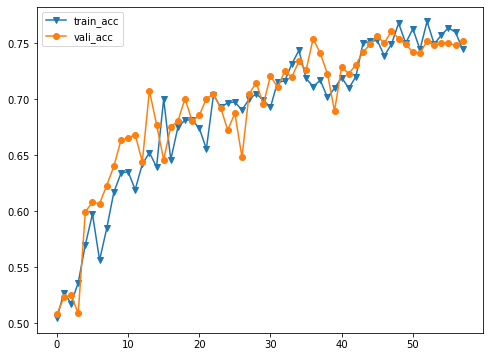

In [76]:

train_acc=after_enhance_data_history.history['acc']
vali_acc=after_enhance_data_history.history['val_acc']

train_loss=after_enhance_data_history.history['loss']
vali_loss=after_enhance_data_history.history['val_loss']

plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)),train_acc,marker='v',label='train_acc')
plt.plot(range(len(train_acc)),vali_acc,marker='o',label='vali_acc')
plt.legend()
plt.show()

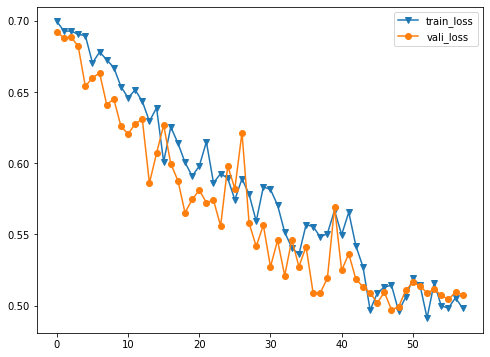

In [77]:

plt.figure(figsize=(8,6))
plt.plot(range(len(train_loss)),train_loss,marker='v',label='train_loss')
plt.plot(range(len(train_loss)),vali_loss,marker='o',label='vali_loss')
plt.legend()
plt.show()

In [78]:

model.evaluate(test_generator)##

32/32 [==============================] - 3s 108ms/step - loss: 0.5742 - acc: 0.7200


[0.5741546750068665, 0.7200000286102295]

In [185]:

from PIL import Image
# test_path="./test_data/download-1.jpg"
# test_path="./test_data/download-3.jpg"
test_path="./test_data/download-2.jpg"

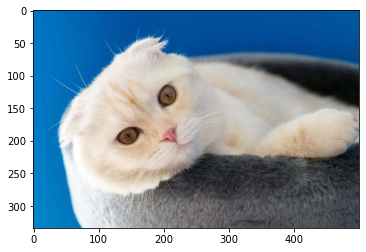

In [186]:
img=Image.open(test_path)
array=np.array(img)
plt.imshow(array)

In [187]:
img=img.resize((64,64))
array=np.array(img)
labels=['cat','dog']
array_img=array[None,:,:,:]
predict=model.predict(array_img/255)
print("this belongs ",labels[np.argmax(predict)])

this belongs  cat


In [188]:
predict

array([[0.50140196, 0.498598  ]], dtype=float32)